In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt 

In [2]:
# นำเข้าข้อมูลจากไฟล์ชื่อ Data Change.csv 
url = 'https://raw.githubusercontent.com/nawinpoyen7/MachineLearning/main/Data%20Change.csv'
df=pd.read_csv(url)
df.sample(20) 

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
7050,462459,Male,0,30,1,Artist,2,0,2,Cat_6,A
4406,467151,Male,0,37,0,Entertainment,1,0,1,Cat_6,D
6979,466395,Female,1,37,1,Doctor,2,2,2,Cat_4,A
7202,463444,Male,1,61,1,Lawyer,1,2,2,Cat_6,B
1814,465980,Female,0,31,1,Healthcare,1,0,7,Cat_6,A
211,459664,Male,0,37,1,Artist,2,0,1,Cat_6,B
2555,460419,Female,1,41,0,Doctor,1,0,1,Cat_7,A
312,466374,Male,1,83,0,Lawyer,1,0,1,Cat_4,B
6063,460625,Female,0,28,0,Marketing,9,0,2,Cat_3,D
6160,467867,Female,0,18,0,Healthcare,0,0,4,Cat_4,D


In [3]:
#ดูภาพรวมข้อมูล
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
ID                 8068 non-null int64
Gender             8068 non-null object
Ever_Married       8068 non-null int64
Age                8068 non-null int64
Graduated          8068 non-null int64
Profession         8068 non-null object
Work_Experience    8068 non-null int64
Spending_Score     8068 non-null int64
Family_Size        8068 non-null int64
Var_1              8068 non-null object
Segmentation       8068 non-null object
dtypes: int64(7), object(4)
memory usage: 693.4+ KB


In [4]:
# เเสดงหัวข้อในเเต่ละคอลัมน์ของฐานข้อมูล
df.columns

Index([u'ID', u'Gender', u'Ever_Married', u'Age', u'Graduated', u'Profession',
       u'Work_Experience', u'Spending_Score', u'Family_Size', u'Var_1',
       u'Segmentation'],
      dtype='object')

In [5]:
#บอกค่าที่หายไปในแต่ละcolumn
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

<Figure size 720x360 with 0 Axes>

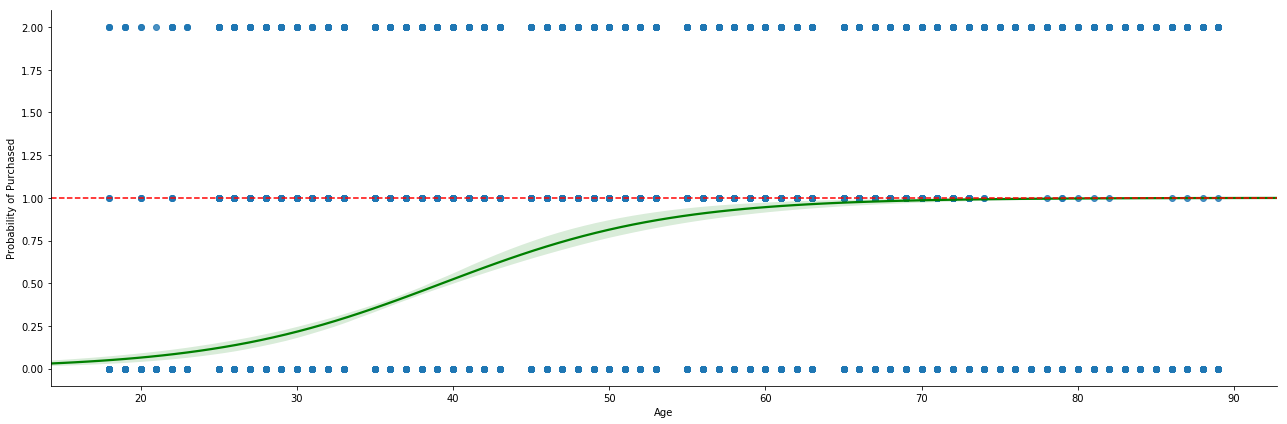

In [6]:
plt.figure(figsize=(10, 5))
sns.lmplot(x='Age', y='Spending_Score', data=df,
           logistic=True, height=6, aspect=3, 
           line_kws={'color': 'green'})
plt.ylabel('Probability of Purchased')
plt.axhline(1, color='red', linestyle='--');

In [7]:
# เช็คประเภทข้อมุล
df.dtypes

ID                  int64
Gender             object
Ever_Married        int64
Age                 int64
Graduated           int64
Profession         object
Work_Experience     int64
Spending_Score      int64
Family_Size         int64
Var_1              object
Segmentation       object
dtype: object

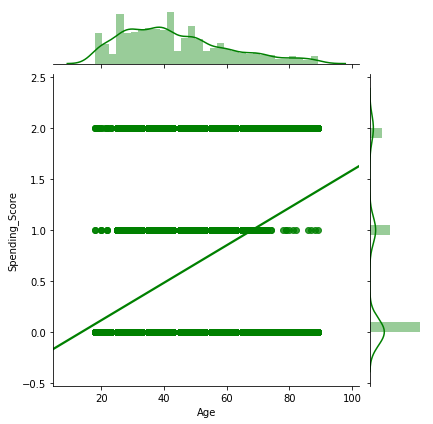

In [8]:
# โดยการใช้ seaborn ทำให้สามารถดูการกระจายตัวของข้อมูล (histogram) ในเเนวเเกน x เเละ y ได้ดังนี้
sns.jointplot(x='Age', y='Spending_Score', data=df, kind='reg', ci=None,
              color='green');

In [9]:
# สร้าง Logistic Regression model โดยใช้ library ของ scikit learn
# นำเข้าคลาสของ Logistic Regression จาก scikit learn โดย
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# เเบ่งข้อมูลออกเป็นชุดเรียนรู้เเละชุดทดสอบโดยกำหนดให้ชุดทดสอบมีขนาดเป็น 30% ของข้อมูล
# X=df[['Age']]
X=df[['Age']]
y=df['Spending_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [10]:
X_train

,Age
5035,47
5882,33
7566,47
4632,65
6368,19
5135,43
2297,50
3423,66
6432,55
4000,33


In [11]:
model = LogisticRegression() # สร้าง object ชื่อ model จาก class ของ LogisticRegression class 
model.fit(X_train, y_train)  # สร้าง model LogisticRegression จากข้อมูล X เเละ Y

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
# ทดลองเเสดงค่า intercept ( θ0 ) เเละ coefficient ( θ1 )

In [13]:
# intercept 
print('intercept = {model.intercept_}') 
# coefficient
print('coefficient = {model.coef_}') 

intercept = {model.intercept_}
coefficient = {model.coef_}


In [14]:
# ทดลองดูเหมาะสมกับข้อมูลของแบบจำลองที่สร้างขึ้นเมื่อเทียบกับข้อมูลโดยใช้ค่า  R2
model.score(X_train, y_train) # accuracy of the model

0.6153709934478484

In [15]:
# model.score(X_test, y_test) # accuracy of the model

In [16]:
# K-fold cross validation

In [17]:
from sklearn.model_selection import KFold, cross_val_score
# from sklearn.model_selection import cross_val_score
from numpy import mean, std
# from numpy import std

In [18]:
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# # evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.614 (0.010)


In [19]:
scores 

array([0.61415929, 0.62654867, 0.59698849, 0.61647476, 0.6173605 ])

In [20]:
# ทดลองการทำนายค่าโดยทำได้ดังนี้

In [21]:
predicted = model.predict(X_test)
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
dx=pd.DataFrame({'y_true': y_test, 'y_pred': predicted})
dx[dx.y_true != dx.y_pred]

,y_pred,y_true
6753,0,2
6434,0,2
3213,0,2
2958,0,1
7769,0,1
5081,0,1
6197,0,2
5510,0,1
377,0,1
2130,0,1


In [23]:
len(dx[dx.y_true != dx.y_pred])

961

In [24]:
dx[dx.y_true == dx.y_pred]

,y_pred,y_true
642,0,0
6714,0,0
2212,0,0
3445,2,2
2938,0,0
148,0,0
2210,0,0
5366,0,0
6507,0,0
673,2,2


In [25]:
# วัดประสิทธิภาพด้วย Confusion matrix

In [26]:
from sklearn import metrics
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predicted).ravel()
print('true negative = {tn}')
print('false positive = {fp}')
print('false negative = {fn}')
print('true positive = {tp}')

ValueError: too many values to unpack

In [27]:
print('accuracy = {metrics.accuracy_score(y_test, predicted)}')
print('precision = {metrics.precision_score(y_test, predicted)}')
print('recall = {metrics.recall_score(y_test, predicted)}')

accuracy = {metrics.accuracy_score(y_test, predicted)}
precision = {metrics.precision_score(y_test, predicted)}
recall = {metrics.recall_score(y_test, predicted)}


In [28]:
# Multiple Logistic Regression

In [29]:
df=pd.read_csv(url, usecols=list(range(2, 5)))
df.head()

,Ever_Married,Age,Graduated
0,0,22,0
1,1,38,1
2,1,67,1
3,1,67,1
4,1,40,1


In [30]:
# ทดลองดูความสัมพันธ์ระหว่างคุณลักษณะ

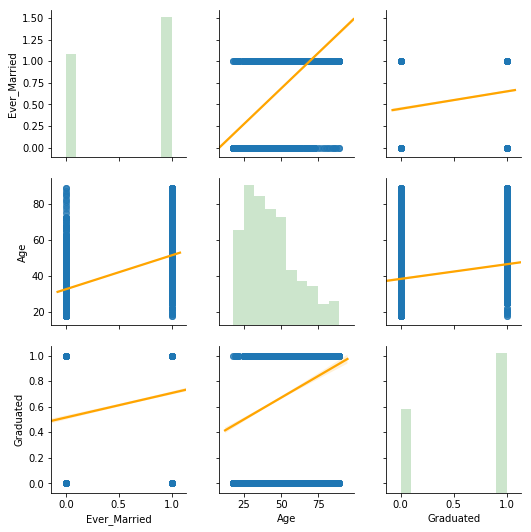

In [31]:
sns.pairplot(df,
             kind='reg', 
             plot_kws={'scatter_kws': {'alpha': 0.4}, 
                       'line_kws': {'color': 'orange'}},
             diag_kws={'color': 'green', 'alpha':.2});

In [32]:
# สร้าง multiple logistic regression model
X = df.drop(columns=['Age'])
y = df['Age']
test_size=.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [33]:
X

,Ever_Married,Graduated
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
5,1,0
6,0,1
7,0,1
8,1,1
9,1,1


In [34]:
mplo = LogisticRegression() 
mplo.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
# ทดลองเเสดงค่า intercept คือ  θ0 ,  θ1  และ  θ2
# intercept 
print('intercept = {mplo.intercept_}') # theta0
# coefficient
print('coefficient = {mplo.coef_}') # theta1 theta2 theta3

intercept = {mplo.intercept_}
coefficient = {mplo.coef_}


In [36]:
# ทดลองดูเหมาะสมกับข้อมูลของแบบจำลองที่สร้างขึ้นเมื่อเทียบกับข้อมูลโดยใช้ค่า  R2
R_squred_train =mplo.score(X_train, y_train) # accuracy of the model
R_squared_error_training = R_squred_train
print(R_squared_error_training)

0.05283545088317323


In [37]:
 R_squred_train =mplo.score(X_train, y_train) # accuracy of the model
 print(R_squred_train) 
 R_squred = mplo.score(X_test, y_test) 
 print(R_squred) 

0.05283545088317323
0.04275092936802974


In [38]:
# Cross valiation

In [39]:
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# # evaluate model
scores = cross_val_score(mplo, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.044 (0.006)


In [40]:
# ทดลองทำนายผลลัพธ์
predicted = mplo.predict(X_test)
predicted 

array([50, 50, 50, ..., 47, 50, 22], dtype=int64)

In [41]:
predicted = mplo.predict(X_test)
dx=pd.DataFrame({'y_true': y_test, 'y_pred': predicted})
dx[dx.y_true != dx.y_pred]

,y_pred,y_true
7592,50,45
4409,50,46
7112,50,53
3363,22,27
4985,50,60
3431,47,61
2445,22,28
7846,33,28
2083,22,33
640,22,26


In [42]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predicted).ravel()
print('true negative = {tn}')
print('false positive = {fp}')
print('false negative = {fn}')
print('true positive = {tp}')

ValueError: too many values to unpack

In [45]:
accuracy = metrics.accuracy_score(y_test, predicted)
print(accuracy)
precision = metrics.precision_score(y_test, predicted)
print(precision)
recall = metrics.recall_score(y_test, predicted)
print(recall)

0.04275092936802974


ValueError: Target is multiclass but average='binary'. Please choose another average setting.